NAME: __________________        CLASS: __________________     DATE: __________________

# Introduction to the Sun

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/DimitriosAstro/Astronomy

In [1]:
# %%capture
# # READ FIRST - Uncomment and Run only if you don't have these pre-requisites installed
# import sys
# !{sys.executable} -m pip install astropy glymur sunpy bs4 drms zeep

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import astropy.units as u
from astropy.utils.exceptions import AstropyWarning
from astropy.time import Time, TimeDelta
import warnings
import glymur
from IPython.display import Image
%matplotlib inline
warnings.simplefilter('ignore', category=AstropyWarning)

### AIM - To access image data on the sun and visualise it in different wavelengths
Difficulty: Easy

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) Do you think the sun looks the same in all wavelengths?  
2) Are there parts of the sun we can only see in certain wavelengths?  
3) How do astronomers deal with such a large amount of data?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Multiwavelength Images of the Sun](#Multi)
* [The Solar Corona](#Corona)
* [Flares and Sunspots](#FSP)
* [Answers](#Answers)
* [Challenges](#Challenges)
* [References](#References)

<a class="anchor" id="Start"></a>
# Let's go: Today's Sun 

We are going to use a python package called [SunPy](https://sunpy.org/) to look at images of the sun from SDO and other telescopes.
Let's load SunPy now:

In [3]:
import sunpy.map
from sunpy.database.tables import display_entries
from sunpy.net import Fido, attrs as a
from sunpy.database import Database
from sunpy.io.file_tools import read_file
import sunpy.timeseries as ts
from sunpy.time import TimeRange
import sunpy.data.sample as sample_data

We can use the Helioviewer to get a Jpeg of the Sun from today:

C:\Users\polyq\Anaconda3\lib\site-packages\sunpy\map\mapbase.py:430: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS. The exception raised was:
Floating point nan values are not allowed in FITS headers.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS. "


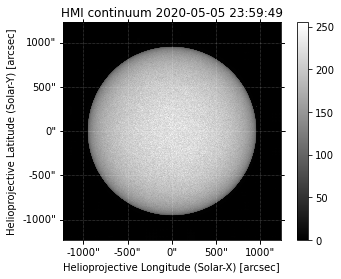

In [4]:
from sunpy.net.helioviewer import HelioviewerClient
hv = HelioviewerClient()  
# date are entered in the format YYYY/MM/DD
# enter today's date into the empty string in the line below
sun = hv.download_jp2('2020/05/06', observatory="SDO", instrument="HMI", measurement="continuum") 
hmiC = sunpy.map.Map(sun)
hmiC.peek()

Here we have specified the telescope (SDO) the instrument/camera (HMI) and the measurement to plot (continuum).
To view the full list of options we can print the data sources available to us like this:

In [5]:
print(hv.data_sources)

OrderedDict([(('SOHO', 'EIT', None, '171'), 0), (('SOHO', 'EIT', None, '195'), 1), (('SOHO', 'EIT', None, '284'), 2), (('SOHO', 'EIT', None, '304'), 3), (('SOHO', 'LASCO', 'C2', 'white-light'), 4), (('SOHO', 'LASCO', 'C3', 'white-light'), 5), (('SOHO', 'MDI', None, 'magnetogram'), 6), (('SOHO', 'MDI', None, 'continuum'), 7), (('SDO', 'AIA', None, '94'), 8), (('SDO', 'AIA', None, '131'), 9), (('SDO', 'AIA', None, '171'), 10), (('SDO', 'AIA', None, '193'), 11), (('SDO', 'AIA', None, '211'), 12), (('SDO', 'AIA', None, '304'), 13), (('SDO', 'AIA', None, '335'), 14), (('SDO', 'AIA', None, '1600'), 15), (('SDO', 'AIA', None, '1700'), 16), (('SDO', 'AIA', None, '4500'), 17), (('SDO', 'HMI', None, 'continuum'), 18), (('SDO', 'HMI', None, 'magnetogram'), 19), (('STEREO_A', 'SECCHI', 'EUVI', '171'), 20), (('STEREO_A', 'SECCHI', 'EUVI', '195'), 21), (('STEREO_A', 'SECCHI', 'EUVI', '284'), 22), (('STEREO_A', 'SECCHI', 'EUVI', '304'), 23), (('STEREO_B', 'SECCHI', 'EUVI', '171'), 24), (('STEREO_B', 

You can see we have access to other telescopes as well such as SOHO and Hinode.  
Let's clean up this plot and make it the orange/yellow colour we see visually.

C:\Users\polyq\Anaconda3\lib\site-packages\sunpy\map\mapbase.py:430: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS. The exception raised was:
Floating point nan values are not allowed in FITS headers.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS. "
C:\Users\polyq\Anaconda3\lib\site-packages\sunpy\map\mapbase.py:430: UserWarning: Unable to treat `.meta` as a FITS header, assuming a simple WCS. The exception raised was:
Floating point nan values are not allowed in FITS headers.
  warnings.warn("Unable to treat `.meta` as a FITS header, assuming a simple WCS. "


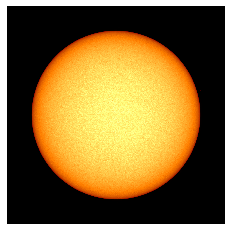

In [6]:
fig = plt.figure(1)
ax = plt.subplot(111, projection=hmiC)
# the axes on the first figure look messy, enter a line of code below to turn the matplotlib axes off
# Your code here:
ax.set_axis_off()

cmap = plt.get_cmap('afmhot')
hmiC.plot(cmap=cmap, annotate=False)
plt.clim(0,300)
# plt.show()

Now compare your awesome image with the HMI Intensitygram on https://sdo.gsfc.nasa.gov/data/.
Intensitygrams show how bright the sun is over it's surface. You'll also see a flattened version on the SDO website. 

1) What is the difference between your image and the flattened version?    
2) What might cause the darkening your photo?

**Enter your answers:**    
1)  
2)

# Multiwavelength Images <a class="anchor" id="Multi"></a>

We know that the sun emits many wavelengths of electromagnetic radiation lets get some images for the different parts of the EM spectrum.
We've already seen a continuum or white light image of the sun that we colourised at the begining of the Notebook.  
To store our new data we are going to start a database which wil help us manage the observations we download:

In [7]:
db = Database('sqlite:///sunpydata.sqlite')
db.default_waveunit = 'angstrom' 

You'll notice a file called sunpydata.sqlite has appeared in our directory.
This is our database. Let's download something to fill it.  
Science ready data from spacecraft is not available instantly so we will have to get information from a while back.

In [8]:
# This may take a few seconds!
# we want aia data so enter aia into the line below for the Instrument attribute
result = Fido.search(a.Time('2019/05/06 12:00', '2019/05/06 12:01'),a.Instrument('aia'),a.vso.Sample(2*u.minute),a.Wavelength(94*u.angstrom)|a.Wavelength(131*u.angstrom)|a.Wavelength(171*u.angstrom)|a.Wavelength(193*u.angstrom)|a.Wavelength(211*u.angstrom)|a.Wavelength(304*u.angstrom)|a.Wavelength(335*u.angstrom)|a.Wavelength(1600*u.angstrom)|a.Wavelength(4500*u.angstrom))
print(result)

Results from 9 Providers:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
------------------- ------------------- ------ ... -------- --------------
2019-05-06 12:00:11 2019-05-06 12:00:12    SDO ... FULLDISK   94.0 .. 94.0

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
------------------- ------------------- ------ ... -------- --------------
2019-05-06 12:00:06 2019-05-06 12:00:07    SDO ... FULLDISK 131.0 .. 131.0

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
------------------- ------------------- ------ ... -------- --------------
2019-05-06 12:00:09 2019-05-06 12:00:10    SDO ... FULLD

You should see a load of tables with the results from our search. Each table is for a different wavelength we specified in Angstrom ($10^{10}$ m).  
We searched images from the SDO instrument AIA, and set ```a.vso.Sample()``` greater than the time period we searched.
This meant we only get one image for each wavelength in that time period (which is only 2 minutes to begin with!).  
We can now download the data.


In [9]:
# This will take a minute
download = Fido.fetch(result,path="./data/")

Now the data is downloaded you should see a folder called data with a bunch of fits files inside.
FITS stands for Flexible Interchangeable Transport System. It is the de facto image format for astronomy.
The image contains a "header" which contains information about the image.
HMI images have been downloaded for you and are already in the folder (using the online search form https://vso.nascom.nasa.gov/cgi-bin/search).  
Let's add the fits in our folder to the database.

In [10]:
db.add_from_dir("./data/", ignore_already_added=True,time_string_parse_format="%d/%m/%Y") 

Let's see what's now in our database:

In [11]:
# Let's remove any bad entries first
for database_entry in db:
    if database_entry.observation_time_start is None and database_entry.observation_time_end is None:
        db.remove(database_entry)
# modify this print statement to also print the instrument the image was taken with
# Your code here:
print(display_entries(db,['id', 'observation_time_start', 'wavemin', 'instrument']))

 id observation_time_start      wavemin       instrument
--- ---------------------- ------------------ ----------
  2    2019-05-06 12:00:06 13.100000000000001      AIA_1
  4    2019-05-06 12:00:14              160.0      AIA_3
  6    2019-05-06 12:00:09               17.1      AIA_3
  8    2019-05-06 12:00:04               19.3      AIA_2
 10    2019-05-06 12:00:09               21.1      AIA_2
 12    2019-05-06 12:00:05 30.400000000000002      AIA_4
 14    2019-05-06 12:00:00               33.5      AIA_1
 16    2019-05-06 12:00:05              450.0      AIA_3
 18    2019-05-06 12:00:11                9.4      AIA_4
 19    2019-05-06 12:00:34  617.3000000000001 HMI_FRONT2
 20    2019-05-06 12:00:34  617.3000000000001 HMI_FRONT2
 21    2019-05-06 12:00:34  617.3000000000001 HMI_FRONT2


We can now search the database. Here we are searching for images in wavelengths between 1-2 nm or 10-20 Angstrom.  
We have also chosen to sort our results by wavlength!

In [12]:
print(display_entries(db.search(a.Wavelength(1.0*u.nm, 2.0*u.nm)),['id', 'observation_time_start', 'instrument', 'wavemin'], sort=True))

 id observation_time_start instrument      wavemin      
--- ---------------------- ---------- ------------------
  2    2019-05-06 12:00:06      AIA_1 13.100000000000001
  6    2019-05-06 12:00:09      AIA_3               17.1
  8    2019-05-06 12:00:04      AIA_2               19.3


Another way to fetch data is to use:
```entries = db.fetch(a.Time('2019/05/06 12:00', '2019/05/06 12:01'), a.Instrument('aia'),a.vso.Sample(2*u.minute),a.Wavelength(94*u.angstrom))```  
This automatically adds the observations to our database and downloads files checking for duplicates.

Now we have our images let's plot them!

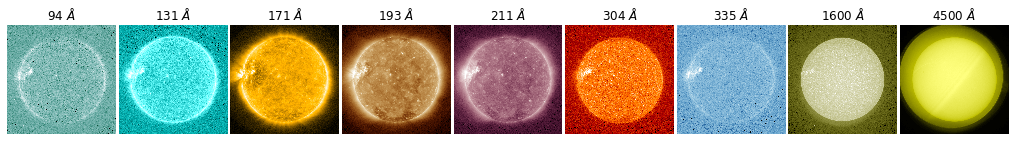

In [13]:
AIA = db.search(a.Wavelength(.1*u.nm, 60.0*u.nm))
AIAplotDic = {}
for obs in AIA:
    AIAplotDic[int(obs.wavemin*10)] = [obs.path,"sdoaia"+str(int(obs.wavemin*10))]
    
fig = plt.figure(num=2, figsize=(len(AIA)*2,2))
count = 0
gs1 = fig.add_gridspec(1,len(AIA), wspace=0.00, hspace=0.0)
for im in sorted(AIAplotDic.keys()):
    smap = sunpy.map.Map(AIAplotDic[im][0])
    ax1 = plt.subplot(gs1[count],projection=smap)
    ax1.set_title(str(im)+r" $\AA$",pad=5)
    cmap = plt.get_cmap(AIAplotDic[im][1])
    smap.plot(axes=ax1, cmap=cmap, annotate=False, clip_interval=(0.1, 99.9)*u.percent)
    ax1.set_axis_off()
    count +=1

plt.show()

Wow! Look at all those images. We have false coloured the data using the SDO colourmaps SunPy provides.  
Let's load one which has been edited in photoshop so they're not all on one row:

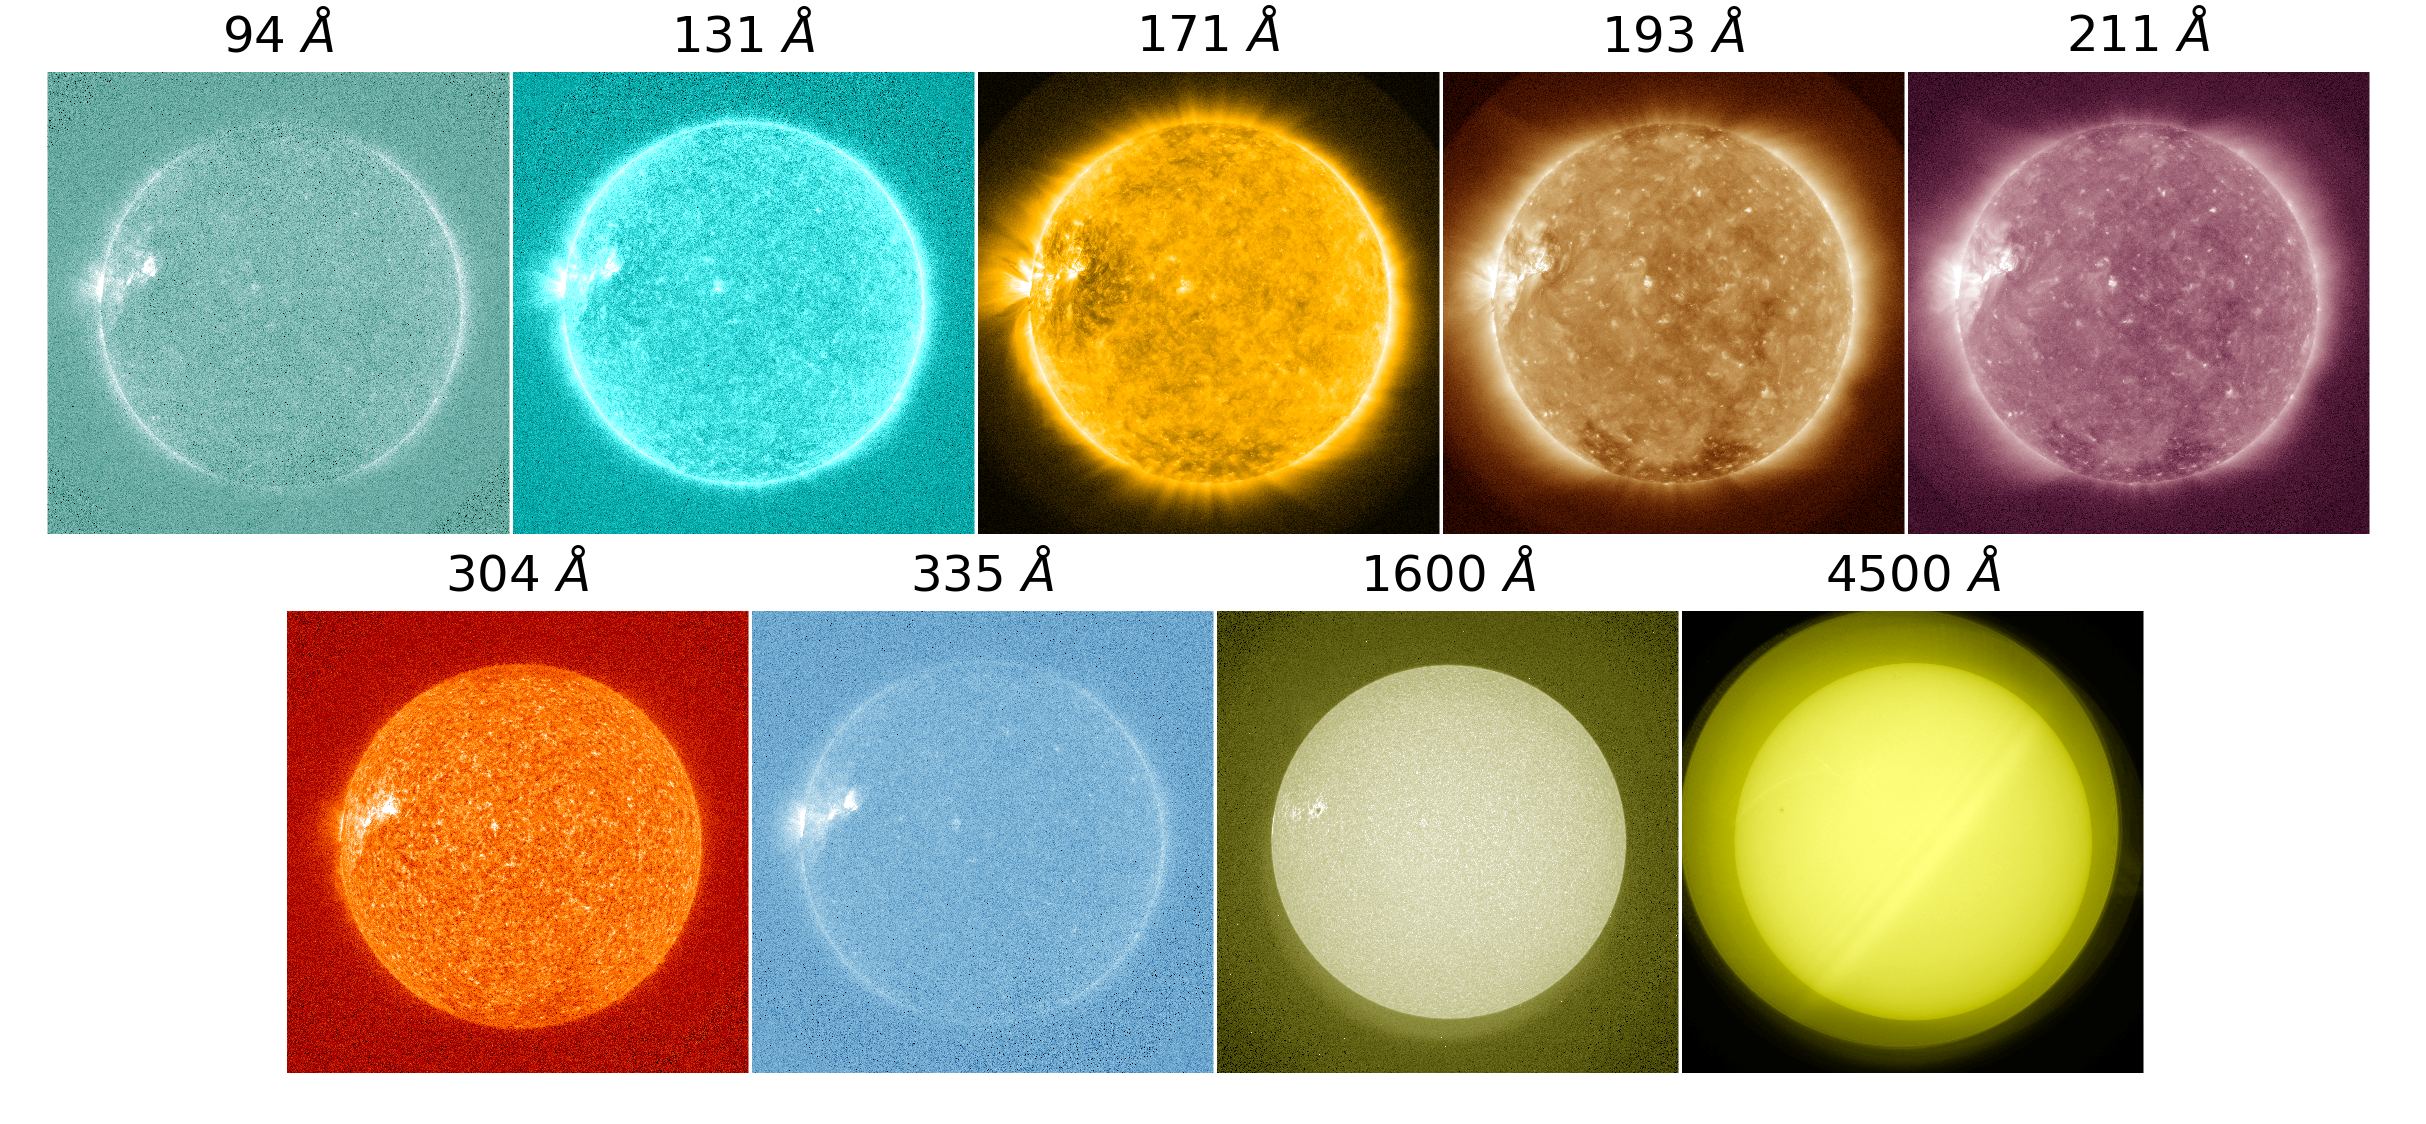

In [14]:
Image("sunAIAstacked.png")

The shortest uv wavelength of 94 Angstrom (9.4 nm, on the verge of being a soft x-ray) is on the top left with the longest on the bottom right.  
All of these images are uv except the botto left which at 450 nm is in the purple/blue end of the visisble spectrum.

3) In which image is it easiest to see sunspots and granules?     
4) Which image/s show the magnetic fields the best?

**Enter your answers:**    
3)  
4)

We know that sunspots are seen in areas with strong magnetic fields (high magnetic field flux - see more), let's now plot the HMI instrument's magnetogram data that was provided for you.

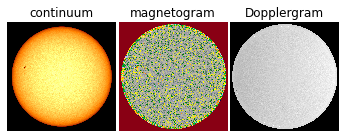

In [15]:
HMI = db.search(a.vso.Instrument("HMI_FRONT2"))
HMIplotDic = {}
cmapCount = 0
cmaps = ['afmhot', 'hmimag', 'kcor']
for obs in HMI:
    HMIplotDic[obs.path.split(".")[-2]] = [obs.path,cmaps[cmapCount]]
    cmapCount += 1

fig = plt.figure(num=3, figsize=(len(HMI)*2,2))
count2 = 0
gs1 = fig.add_gridspec(1,len(HMI), wspace=0.00, hspace=0.0)
for im in HMIplotDic.keys():
    hmi_map = sunpy.map.Map(HMIplotDic[im][0])
    ax2 = plt.subplot(gs1[count2],projection=hmi_map)
    ax2.set_title(im,pad=5)
    cmap = plt.get_cmap(HMIplotDic[im][1])
    hmi_rotated = hmi_map.rotate(order=3)
    if im == "continuum":
        cont = hmi_rotated.plot(axes=ax2, cmap=cmap, annotate=False, clip_interval=(0.1, 99.9)*u.percent)
        cont.set_clim(0,70000)
    elif im == "magnetogram":
        hmi_rotated.plot_settings['norm'] = plt.Normalize(-1000, 1000)
        hmi_rotated.plot(axes=ax2, cmap=cmap, annotate=False)
    else:
        hmi_rotated.plot(axes=ax2, annotate=False, clip_interval=(0.1, 99.9)*u.percent)
    ax2.set_axis_off()
    count2 +=1
    
plt.show()

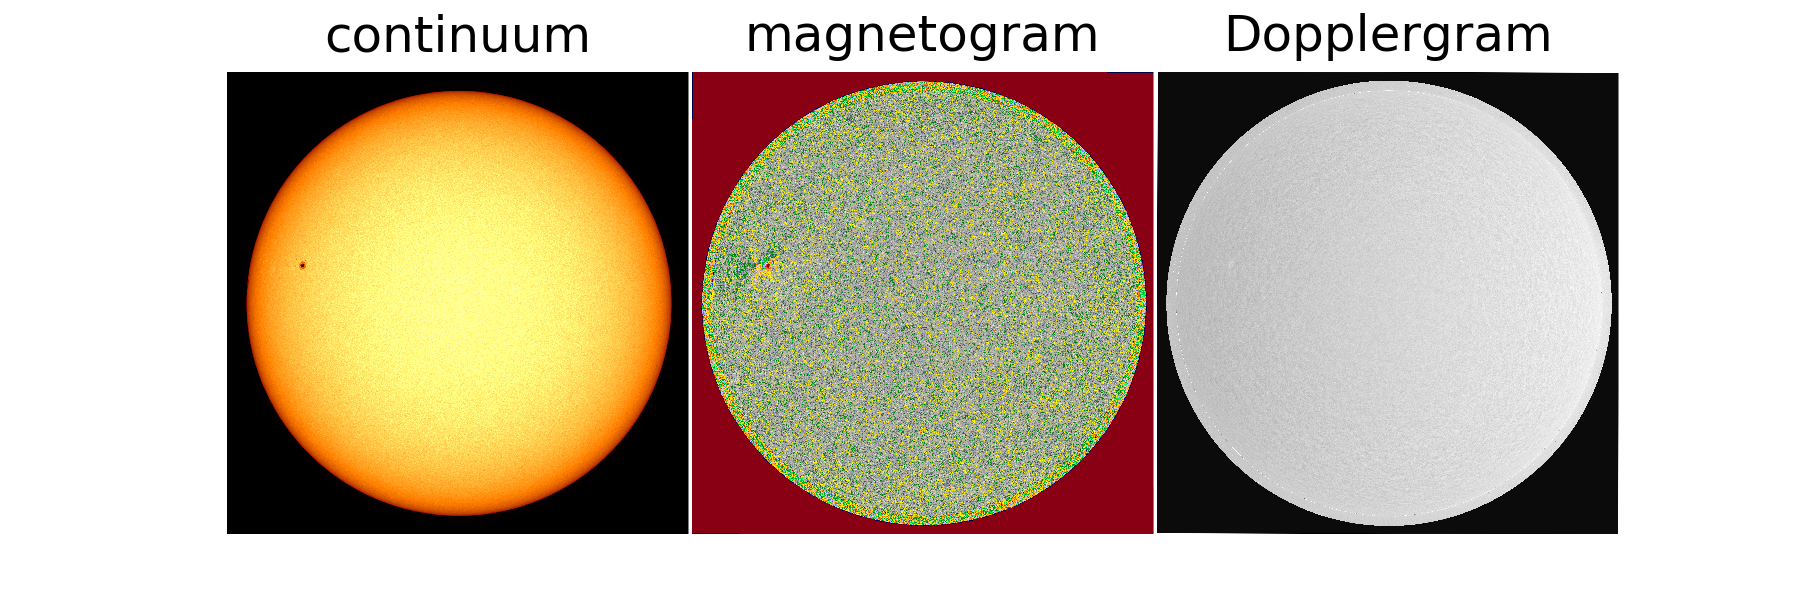

In [16]:
Image("sunHMI.png")

The three images we see here are a continuum image (like the intensitygram we plotted at the start) of the photosphere, a map of the photosphere's magnetic field, and a map of the solar surface velocity.
We had to rotate these images to align them with AIA ones because the two instruments are orientated differently on the spacecraft.

# Solar Corona <a class="anchor" id="Corona"></a>

We can also use SunPy to look at pictures of the solar corona.
The SOHO telescope has three detectors (C1,C2,C3) on its LASCO instrument which image the corona in different wavelengths and distances from the photosphere.  
Let's get an image from the LASCO C1 detector:

In [17]:
%%capture
# using the examples of Fido.search above find images from the LASCO instrument's C3 detector on the 27/2/2000
# between 7:42 and 7:43 am
# Your code here:
coronaSOHO = Fido.search(a.Time('2000/02/27 07:42', '2000/02/27 07:43'), a.Instrument('LASCO'), a.Detector('C3'))

# I is a good idea to print this search before attempting to download it
# This will help you check that you're not downloading tons of files or no files

coronaSOHOdata = Fido.fetch(coronaSOHO[0],path="./lascoData/")
data, header = read_file(coronaSOHOdata[0])[0]

header['CUNIT1'] = 'arcsec'
header['CUNIT2'] = 'arcsec'

coronamap = sunpy.map.Map(data, header)
fig = plt.figure(4)
axSOHO = plt.subplot(111, projection=coronamap)
axSOHO.set_title("LASCO C3")
lasco = coronamap.plot(annotate=False, norm=colors.LogNorm(), clip_interval=(25.0, 99.5)*u.percent)
# lasco.set_clim(0,8000)
axSOHO.set_axis_off()
plt.colorbar()

# To view the figure remove the capture declaration at the top of the cell
# What does the commented line lasco.set_clim(0,8000) do?

# plt.show()
plt.savefig("sunLASCOC3.png", dpi=300)

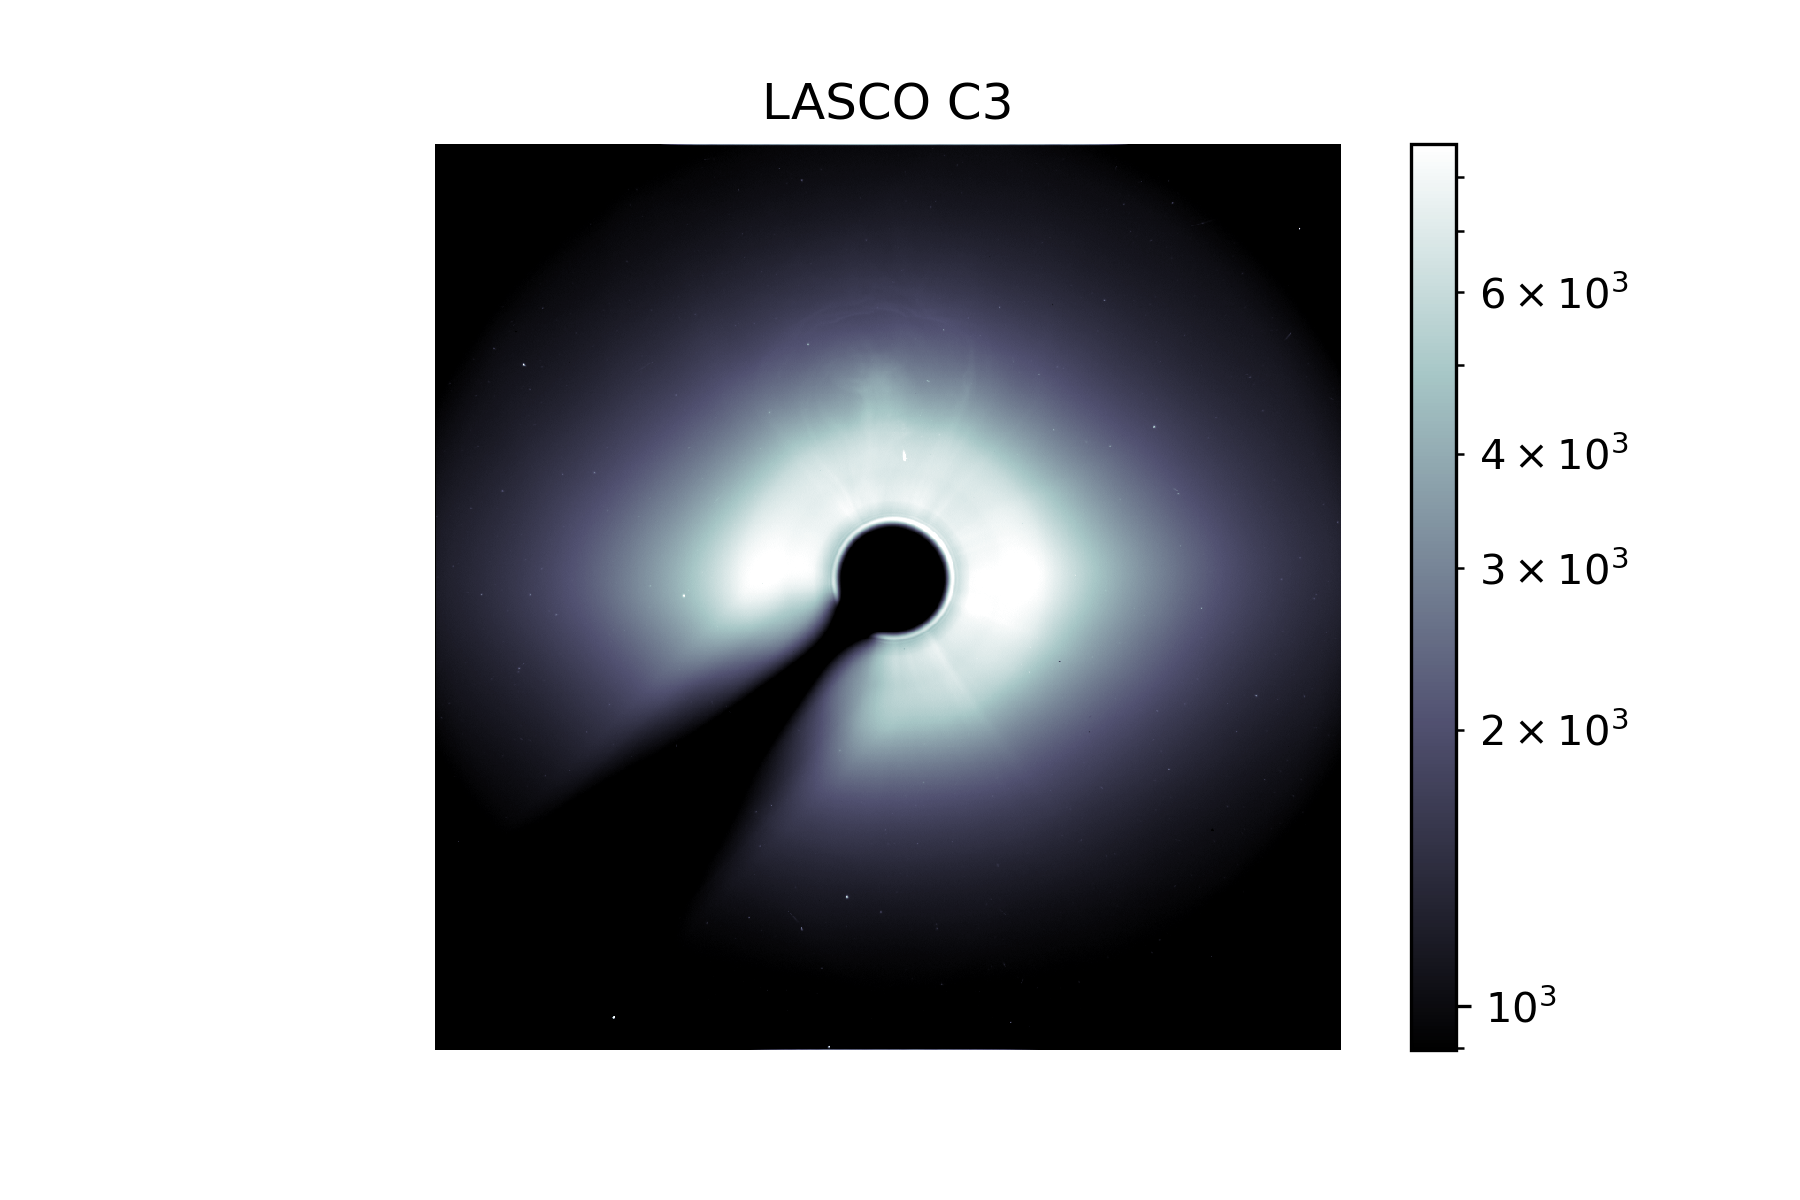

In [18]:
Image("sunLASCOC3.png")

Look closely enough and you'll see a loop in the corona at the top! Try adjusting some numbers in the ```clip_interval=(,)*u.percent``` and adding the ```set_clim(,)``` command to make it pop out more.

5) What causes the black region in this image that extends from the bottom left to the center?

**Enter your answer:**    
5)  

# Flares and Sunspots <a class="anchor" id="FSP"></a>

Flares are best seen near the edge of the solar disk where we see them extending out into space. SunPy can be used to visualise these flares. The following code snippet from the SunPy Docs here shows a M2.5 flare that occured on the 7th of June 2011.

In [19]:
%%capture
aia_cutout03_map = sunpy.map.Map(sample_data.AIA_193_CUTOUT03_IMAGE)
# Try plotting this map like we did above for the LASCO image
# Your code here:
fig = plt.figure(5)
ax = fig.add_subplot(111, projection=aia_cutout03_map)
aia_cutout03_map.plot()

# plt.show()
plt.savefig("sunFlare.png", dpi=300)

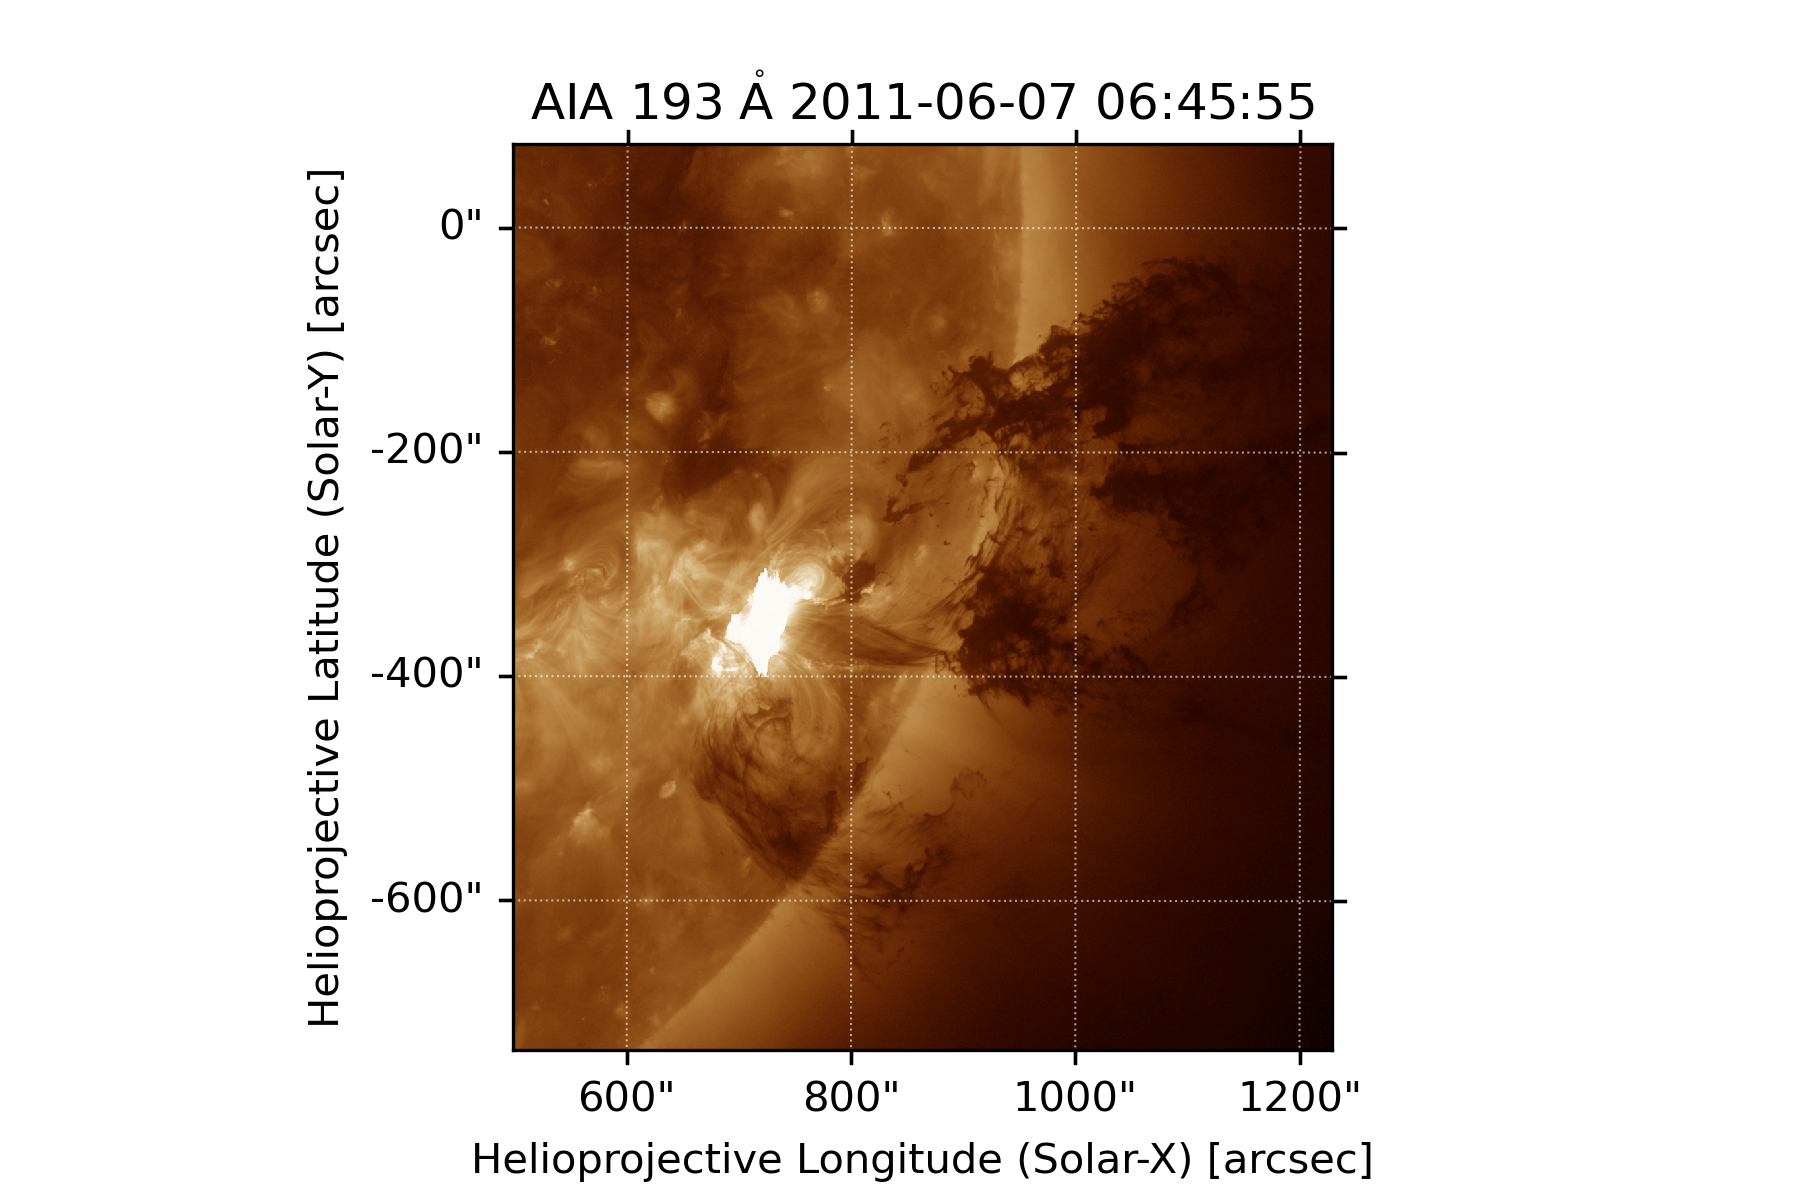

In [20]:
Image("sunFlare.png")

I enourage you to delve into the documentation for this code snippet. You will find examples there of plotting the x-ray flux for the event and creating a series of images showing how the flares shape changed over time.  
We saw sunspots on our earlier images. Let's use SunPy to plot NOAA data for the number of sunspots as a function of time.

In [21]:
%%capture
time_range = TimeRange("1980-06-01 00:00", Time.now())
result = Fido.search(a.Time(time_range), a.Instrument('noaa-indices'))
f_noaa_indices = Fido.fetch(result)
result = Fido.search(a.Time(time_range.end, time_range.end + TimeDelta(4 * u.year)),
                     a.Instrument('noaa-predict'))
f_noaa_predict = Fido.fetch(result)

noaa = ts.TimeSeries(f_noaa_indices, source='noaaindices').truncate(time_range)
noaa_predict = ts.TimeSeries(f_noaa_predict, source='noaapredictindices')

fig, ax = plt.subplots()
ax.plot(noaa.index, noaa.quantity('sunspot RI'), label='Sunspot Number')
ax.plot(noaa_predict.index, noaa_predict.quantity('sunspot'),
        color='grey', label='Near-term Prediction')
ax.fill_between(noaa_predict.index, noaa_predict.quantity('sunspot low'),
                noaa_predict.quantity('sunspot high'), alpha=0.3, color='grey')
ax.set_ylim(bottom=0)
ax.set_ylabel('Sunspot Number')
ax.set_xlabel('Year')
ax.legend()
# plt.show()
plt.savefig("sunSunspots.png", dpi=300)

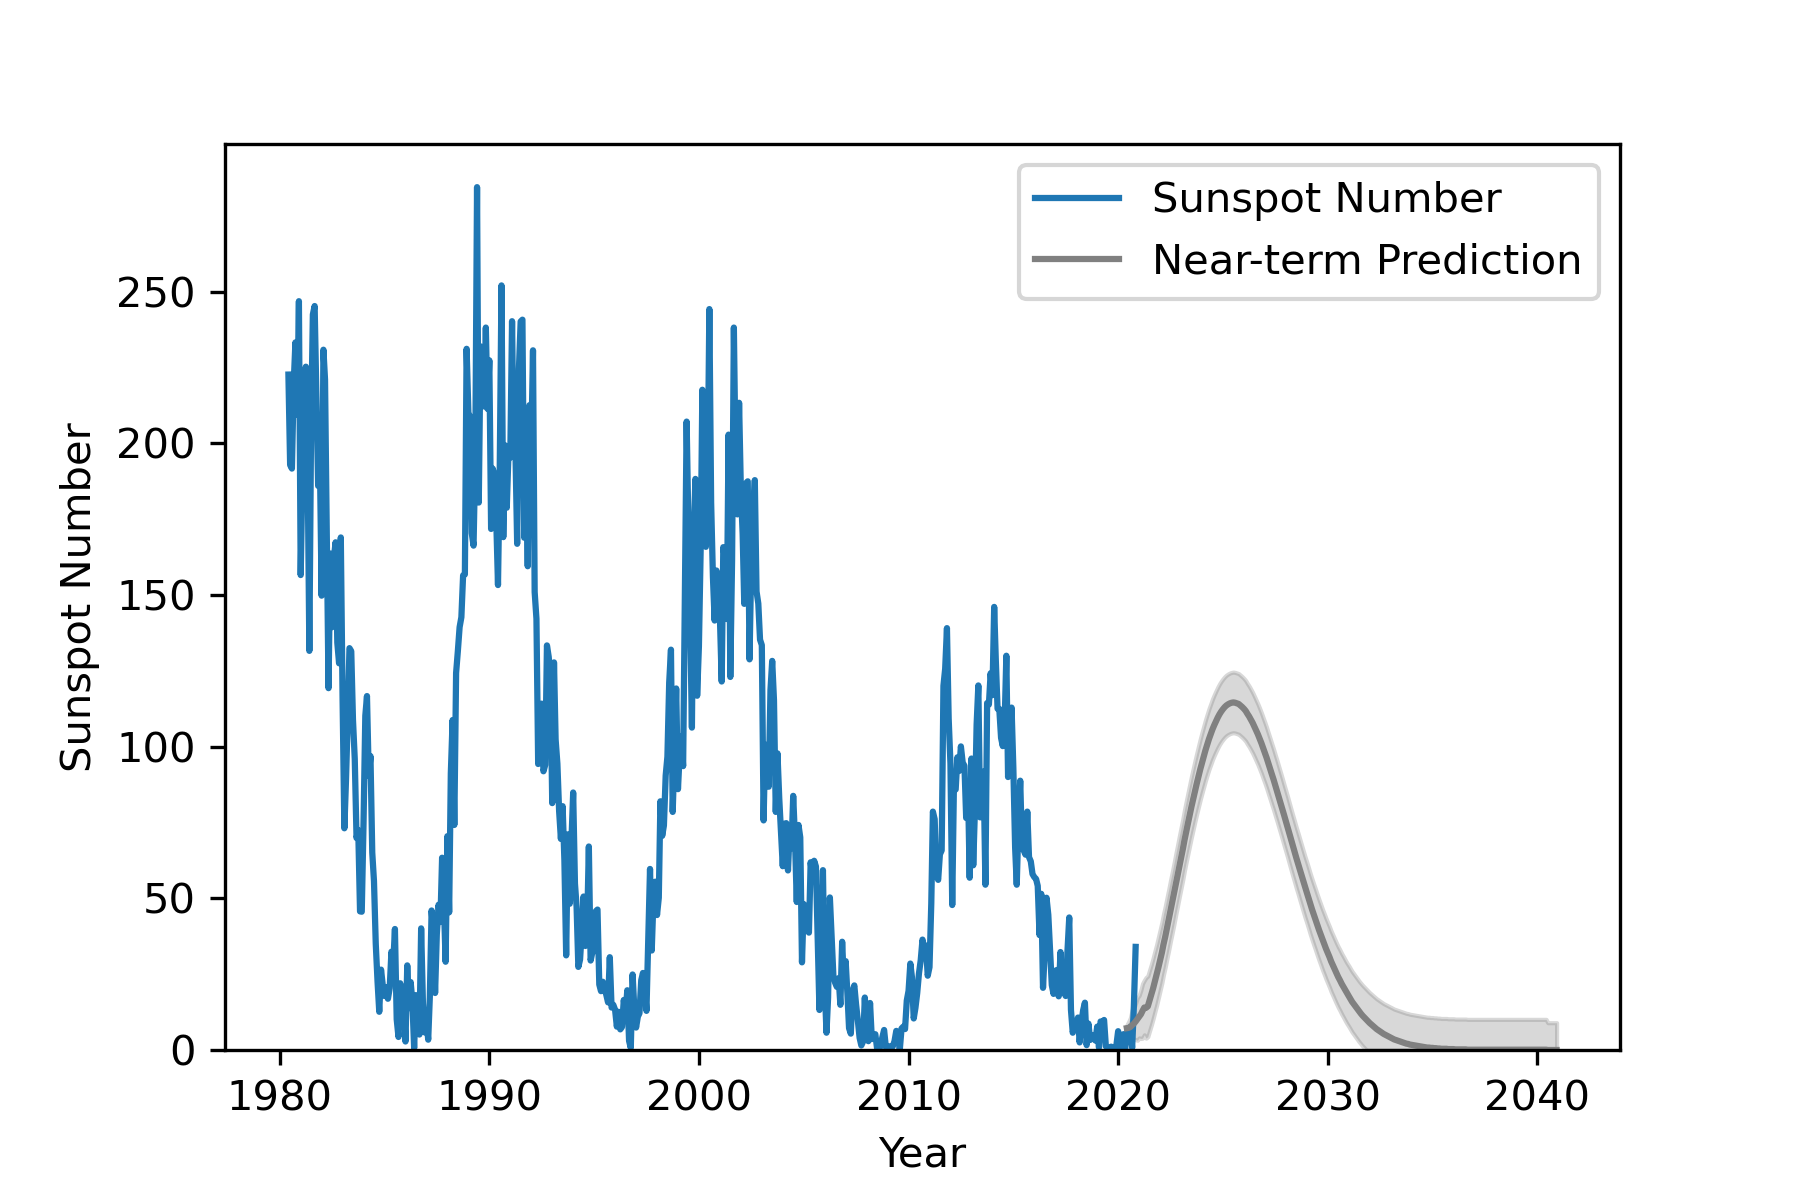

In [22]:
Image("sunSunspots.png")

The sun has a 11 year cycle which you can see from the graph.
You can also see that sunspot activity at the peak of the cycle has been decreasing over the last two decades.
Visit the docs [here](https://docs.sunpy.org/en/stable/generated/gallery/plotting/solar_cycle_example.html#sphx-glr-generated-gallery-plotting-solar-cycle-example-py) to see this code snippet.

6) Search online for an updated sunspot cycle figure. What was the peak sunspot number in 2020?      
7) Are the sunspot numbers generally increasing or decreasing from 2010-2020?

**Enter your answers:**    
6)    
7)

# Answers <a class="anchor" id="Answers"></a>

1) Your image should show the sun getting darker at the edges.    
2) The flattened image takes into account the fact that most of the light from the sides of the sun as we see it is not directed towards us. This makes the sun look darker near the edges like in our image. This effect is called limb darkening.    
3) You can see the granules most clearly in the 304 Angstrom image. You should also be able to see a sunspot on the left side of the disk in the 1600 Angstrom image.    
4) The 171-211 Angstrom images show the magnetic fields the best. You can see how the field lines extend out from the surface of the Sun if you look at the edge of the disk.     
5) The black line in some of the images you see from LASCO are from the arm that holds a disc which blocks out the light from the solar disk. If you didn't block out the main light from the sun it would overpower the light from the corona and it wouldn't be visible.    
6) Close to 0!    
7) Trick question! For the past decade (2010-2020) the Sun has been in solar cycle 24 with a peak in sunspot activity in 2014. Overall sunspots numbers are decreasing each cycle as we come out of a period of increased solar activity (Modern Solar Maximum).    

# Challenge <a class="anchor" id="Challenges"></a>

 1) Make LASCO plots for the other detectors  
 2) Make an animation of the flare shown above using the code in the SunPy docs  
 3) Make a graph of sunspot number vs time from the 19th century to today using: http://www.sidc.be/silso/datafiles

# References and Resources <a class="anchor" id="References"></a>

SunPy - https://sunpy.org/  
Pereria, T. M. D., https://folk.uio.no/tiago/teaching/ast2210/sunpy_aia/ - Sunspot animations  
Sunspot Number Data - SILSO, Royal Observatory of Belgium, http://www.sidc.be/silso/datafiles  

Source keywords for searches - https://sdac.virtualsolar.org/cgi/show_details?keyword=SOURCE  
Instrument keywords for searches - https://sdac.virtualsolar.org/cgi/show_details?instrument=HMI  

SDO Images from today - https://sdo.gsfc.nasa.gov/data/  
HMI Instrument page - http://hmi.stanford.edu/